# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Imports
from splinter import Browser
from bs4 import BeautifulSoup as soup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Set browser
browser = Browser('chrome')

# My alternate path for chromedriver
# from selenium.webdriver.chrome.service import Service
# import os
# my_path= os.path.abspath('C:\Drivers\chromedriver.exe')
# my_service = Service(executable_path=my_path)
# browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
hot_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
kitchen_table = hot_soup.find_all('tr', class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
tobs = []
# Loop through the extracted data to create a list of rows
for row in kitchen_table: 
    data = row.find_all('td')    
    tobs.append([d.text.strip('[]') for d in data])   

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
mdf = pd.DataFrame(tobs, columns = columns)
# view DataFrame
mdf

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mdf.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

mdf['id']= mdf['id'].astype(int)
mdf['terrestrial_date'] = pd.to_datetime(mdf['terrestrial_date'])
mdf['sol'] = mdf['sol'].astype(int)
mdf['ls'] = mdf['ls'].astype(int)
mdf['month']= mdf['month'].astype(int)
mdf['min_temp'] = mdf['min_temp'].astype(float)
mdf['pressure'] = mdf['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again

mdf.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


# 1. How many months are there on Mars?

In [12]:
time = len(mdf['month'].unique())
print(f'There are {time} months on Mars!')

There are 12 months on Mars!


# 2. How many Martian days' worth of data are there?

In [17]:
mdays = len(mdf['sol'])
print(f"There are {mdays} Martian days' worth of data!")

There are 1867 Martian days' worth of data!


# 3. What is the average low temperature by month?

In [18]:
avtem = mdf['min_temp'].groupby(mdf['month']).mean()
avtem 

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

# Plot the average temperature by month

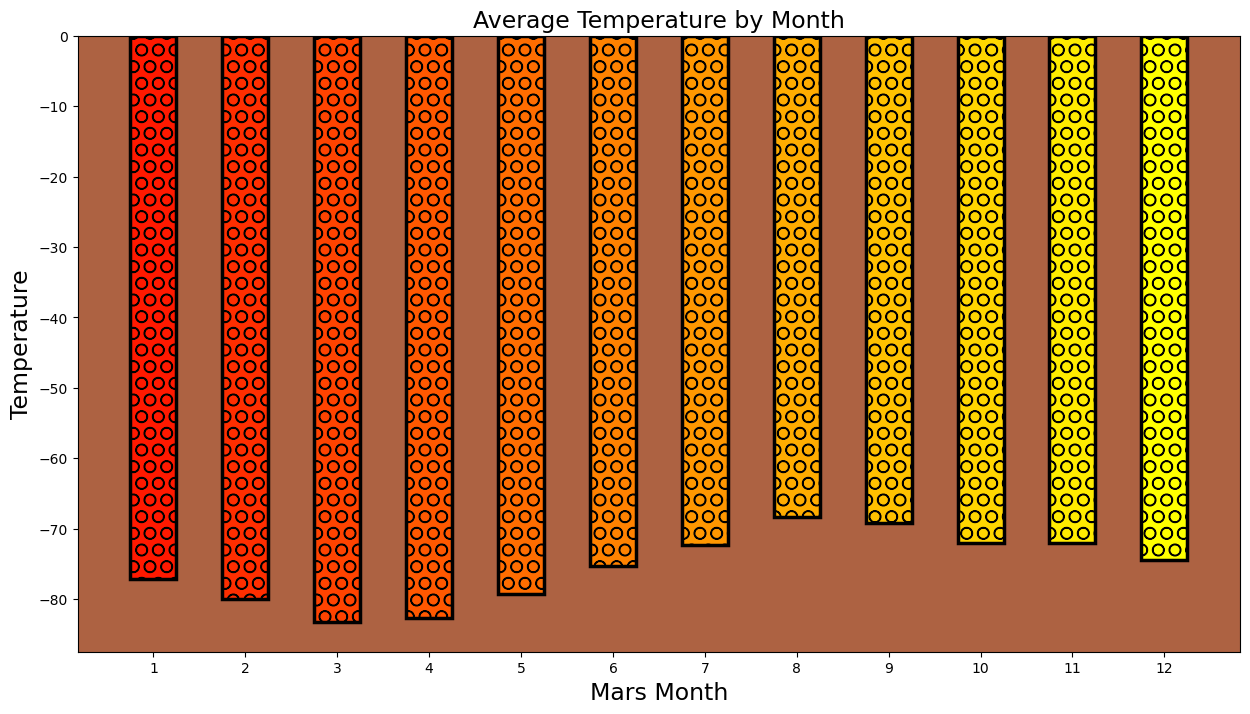

The chart shows us the third month has coldest average temperature,
and the eighth month has the warmest


In [21]:
# Set new index
months =[1,2,3,4,5,6,7,8,9,10,11,12]

# Set colors and parameters           
color = mpl.cm.autumn(np.linspace(.1,1,  12))  
plt.rcParams['axes.facecolor'] = '#ad6242'     
plt.figure(figsize=(15, 8))

# Plot the chart
plt.bar(avtem.index, avtem.values, align='center',hatch='O',color=color, edgecolor="black", width= .5, linewidth=2.5)
plt.xticks(months)
plt.title("Average Temperature by Month", fontsize = 17)
plt.xlabel('Mars Month', fontsize = 17)
plt.ylabel('Temperature', fontsize = 17) 

# Save the image and show the chart
plt.savefig("../Visuals/Average Monthly MinTemp.jpeg")
plt.show()
# Print statement
print("The chart shows us the third month has coldest average temperature,\n""and the eighth month has the warmest" )

# Identify the coldest and hottest months in Curiosity's location

In [22]:
# Determine the month with the lowest minimum temperature average
coldmonth = mdf['min_temp'].groupby(mdf['month']).mean().idxmin()
coldtemp = mdf['min_temp'].groupby(mdf['month']).mean().min()
 
# Determine the month with the highest minimum temperature average
hottemp = mdf['min_temp'].groupby(mdf['month']).mean().max()
hotmonth = mdf['min_temp'].groupby(mdf['month']).mean().idxmax()

# Coldest and hottest months print statements 
print(f"The coldest month in Curiosity's location is month {coldmonth}\n"f"\
with a temperature of {round(coldtemp,1)}!")
print(f"The hottest months in Curiosity's location is {hotmonth}\n"f"\
with a temperature of {round(hottemp,1)}!")   

The coldest month in Curiosity's location is month 3
with a temperature of -83.3!
The hottest months in Curiosity's location is 8
with a temperature of -68.4!


# 4. Average pressure by Martian month

In [23]:
# Group by month and get the average pressure
avpress = mdf['pressure'].groupby(mdf['month']).mean()
avpress

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

# Plot the average pressure by month

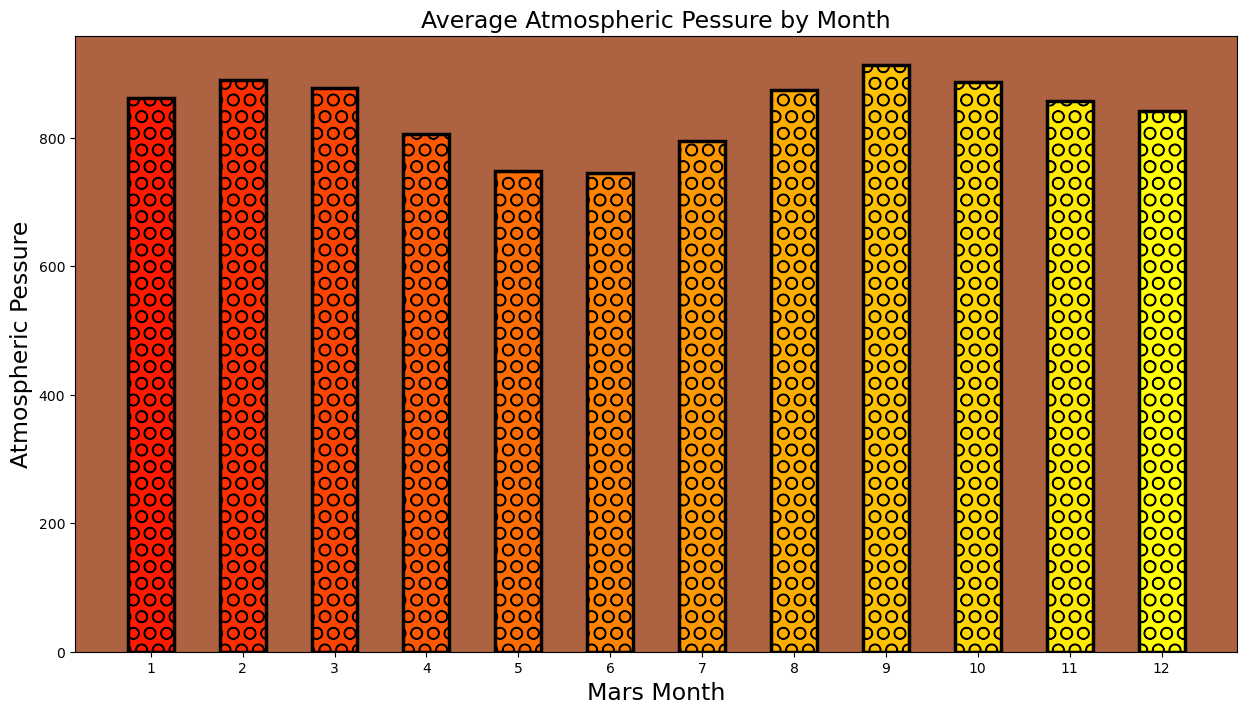

The chart shows us the sixth month has the lowest average pressure,
and the ninth month has the highest


In [25]:
# Set new index
months =[1,2,3,4,5,6,7,8,9,10,11,12]

# Set colors and parameters
plt.figure(figsize=(15, 8))                    
color = mpl.cm.autumn(np.linspace(.1,1,  12))  
plt.rcParams['axes.facecolor'] = '#ad6242'     

# Plot the chart
plt.bar(avpress.index, avpress.values, align='center',hatch='O',color=color, edgecolor="black", width= .5, linewidth=2.5)
plt.xticks(months)
plt.title("Average Atmospheric Pessure by Month", fontsize = 17)
plt.xlabel('Mars Month', fontsize = 17)
plt.ylabel('Atmospheric Pessure', fontsize = 17) 

# Save the image and show the chart
plt.savefig("../Visuals/Average Monthly Pressure.jpeg")
plt.show()
# Print statement
print("The chart shows us the sixth month has the lowest average pressure,\n""and the ninth month has the highest" )

# Which month, on average, has the lowest atmospheric pressure? The highest? 

In [26]:
# Calculate the month with the lowest average pressure
low_press_month = mdf['pressure'].groupby(mdf['month']).mean().idxmin()
low_press= mdf['pressure'].groupby(mdf['month']).mean().min()

# Calculate the month with the highest average pressure
high_press_month = mdf['pressure'].groupby(mdf['month']).mean().idxmax()
high_press= mdf['pressure'].groupby(mdf['month']).mean().max()

# Lowest and highest pressure months print statements 
print(f"The month with the lowest atmospheric pressure on average is month {low_press_month}\n"f"\
with a pressure rating of {round(low_press,2)}!")
print(f"The month with the highest atmospheric pressure on average is {high_press_month}\n"f"\
with a pressure rating of {round(high_press,2)}!") 

The month with the lowest atmospheric pressure on average is month 6
with a pressure rating of 745.05!
The month with the highest atmospheric pressure on average is 9
with a pressure rating of 913.31!


# 5. How many terrestrial (earth) days are there in a Martian year?

In [30]:
# Finding the Solar longitude at the start (first row) of the data
start_ls=mdf['ls'].loc[0]
print(f"The Solar Longitude at the start of the data is {start_ls}!")

The Solar Longitude at the start of the data is 155!


In [31]:
# The Solar longitude will be the same after Approximately 1 Martial year
# Determine the other rows with the same solar longitude as the start_ls
rows_ls = mdf.loc[mdf['ls'] == start_ls]
rows_ls

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [32]:
# Determine the difference in earth days for 1 martial year
# The terrestrial date  from the first row of the data
first_row = rows_ls['terrestrial_date'].iloc[0]

# The recorded data shows there are 2 rows at each ls occurance
# The third row in the Table above is the second row of the solar longitude returning to 
# The starting ls of 155. This is the estimated end of the year
third_row = rows_ls['terrestrial_date'].iloc[2]

# Subtract the difference it dates
mar_year = third_row - first_row

# Print statement
print(f"The estimated count of Earth days in a Martian year is {mar_year.days} days!")



The estimated count of Earth days in a Martian year is 687 days!


# Plot the minumun temperatures by day to see if the chart reflects the above estimated day count

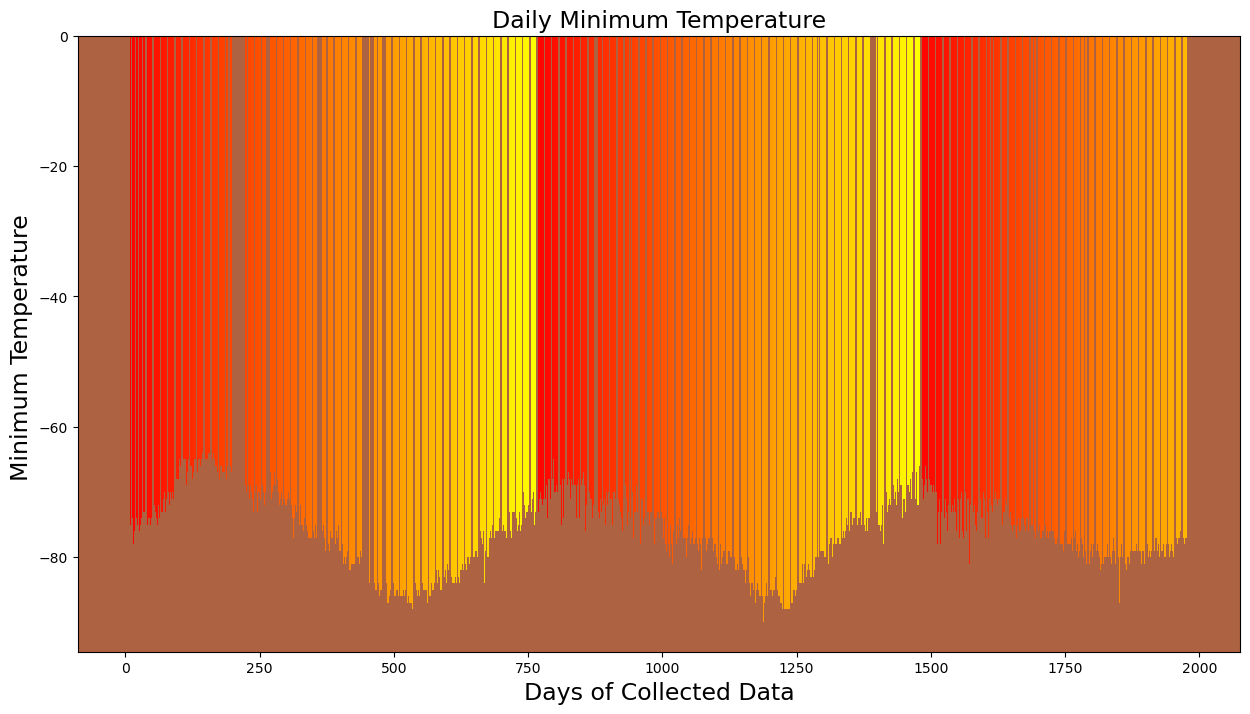

The chart does appear to confirm that 687 days is an accurate estimation for 1 Martian Year


In [33]:
# Set colors and parameters
plt.figure(figsize=(15, 8))                    
color = mpl.cm.autumn(np.linspace(.01,1,  687))  
plt.rcParams['axes.facecolor'] = '#ad6242'
# Plot the chart
plt.bar(mdf['sol'], mdf['min_temp'], align='center',color=color)
plt.title('Daily Minimum Temperature', fontsize = 17)
plt.xlabel('Days of Collected Data', fontsize = 17)
plt.ylabel('Minimum Temperature ', fontsize = 17) 

# Save the image and show the chart
plt.savefig("../Visuals/Daily MinTemp.jpeg")
plt.show()

# Print statement
print(f"The chart does appear to confirm that {mar_year.days} days is an accurate estimation for 1 Martian Year")

#  __________________________________________________

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [34]:
# Write the data to a CSV
mdf.to_csv('../Data/mars_data.csv')  

In [35]:
browser.quit()